By Benjamin Choi

ESE 419, HW4

(1) Use Python to generate a 2D (𝒙𝑖∈ℛ2) non-linear-separable data set with 100 positive instances and 100 negative instances and create a scatter plot to visualize the data set.

(2) Randomly split the data set into training set (contains 150 of the data points) and test set (contains 50 of the data points)

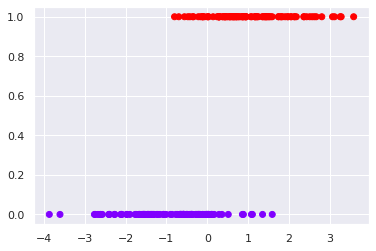

In [0]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

# draw random samples
x, y = make_classification(
    n_samples=200,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.0,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    random_state=197
)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size = .25)
plt.scatter(x, y, c=y, cmap='rainbow')

(3) Use Python (not sklearn package) to create the training algorithm of logistic regression method and use the training data set in 1.(2) to train a Logistic Regression model. Plot the error function curve when the training process converges. Create a plot that shows the training instances and the learnt decision boundary.

In [0]:
data = x_train
targets = y_train
l=[1]
for t in data:
  l.append(t[0])
data = np.array(l)

N = len(data)
#w_old = np.random.rand(1,N)
w_old = np.zeros((1,N))
num_of_err = 1
ErrorList = []
learningRate = .01

def sigmoid(x):
  sig = 1 / (1+np.exp(-x))
  return sig

def new_weights(weights, grad):
  weights = weights - learningRate*grad
  return weights

def errorFunc(weights, data, targets):
  Err = 0
  gradErr = 100 
  numErrors = 0

  for i in range(len(data)):
    temp=[]
    for j in range(len(data)):
      temp.append(data[i])
    xi=np.array(temp)
    a = np.dot(weights, xi)
    p = sigmoid(a/len(data))
    numErrors += 1
    if i == len(targets)-1:
      break
    Err = Err - (-targets[i+1]*np.log2(p)-(1-targets[i+1])*np.log2(1-p))
    gradErr = gradErr - (targets[i+1] - p)*data[i]
    
  ErrorList.append(Err)
  return [gradErr, numErrors]

gErr = 100
while abs(gErr) > 25:
  g = errorFunc(w_old, data, y_train)
  w_old = new_weights(w_old, g[0])
  gErr = g[0]
  print(g[0])

model = w_old
w_new = w_old

[95.05209904]
[44.1173921]
[33.61895383]
[28.69036219]
[25.74517804]
[23.75924715]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


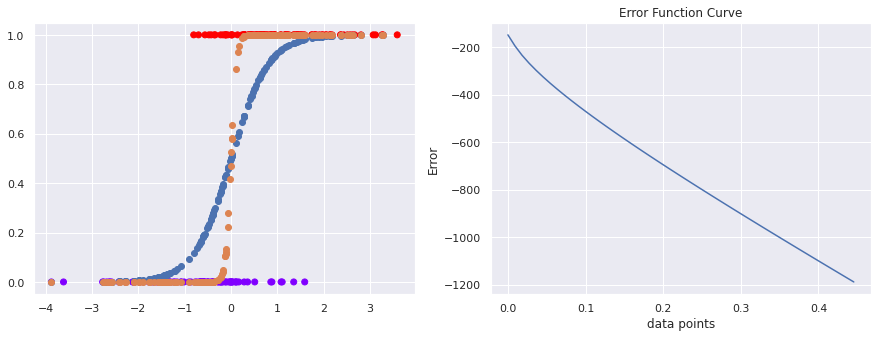

In [0]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(x, y, c=y, cmap='rainbow')

alist = []
for k in data:
  a = w_new[0][1]*k
  alist.append(a)

a = np.array(alist)
z1 = sigmoid(-a)

plt.scatter(data,z1)

gErr = 100
while abs(gErr) > 13.7:
  g = errorFunc(w_old, data, y_train)
  w_old = new_weights(w_old, g[0])
  gErr = g[0]

w_new = w_old

blist = []
for k in data:
  b = w_new[0][1]*k
  blist.append(b)

b = np.array(blist)
z2 = sigmoid(-b)

plt.scatter(data,z2)

plt.subplot(122)
x_axis = np.linspace(0,1,len(ErrorList))
plt.xlabel('data points')
plt.ylabel('Error')
plt.title('Error Function Curve')
plt.grid(True)
plt.plot(x_axis, ErrorList)

(4) Test the trained model on the test data set in 1.(2) and calculate the confusion matrix, accuracy, precision and recall of the trained model.

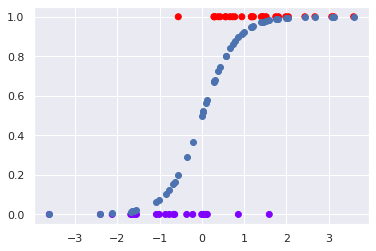

In [0]:
testdata = x_test
targets = y_test
l=[1]
for t in testdata:
  l.append(t[0])
testdata = np.array(l)

plt.scatter(x_test,y_test , c=y_test, cmap='rainbow')

alist = []
for k in testdata:
  a = model[0][1]*k
  alist.append(a)

a = np.array(alist)
z1 = sigmoid(-a)

plt.scatter(testdata,z1)

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

predicted = []
test = []
for i in range(len(testdata)):
  if i == len(y_test):
    break
  a = model[0][1]*testdata[i+1]
  pi = 1/(1+math.exp(a))
  if pi < .5:
    predicted.append(0)
  else:
    predicted.append(1)

results = confusion_matrix(y_test, predicted) 
print(results) 
print("Accuracy:")
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

[[16  6]
 [ 1 27]]
Accuracy:
0.86
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        22
           1       0.82      0.96      0.89        28

    accuracy                           0.86        50
   macro avg       0.88      0.85      0.85        50
weighted avg       0.87      0.86      0.86        50



2. Support Vector Machine Method in sk-learn package:

Consider the support vector machine model with RBF kernel from sk-learn package. Tune the kernel parameter gamma to find the model with best accuracy on the digits data set. Show the training and test accuracy curve with respect to gamma.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs
# https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python# 
# Code source: Gaël Varoquaux
# License: BSD 3 clause

In [0]:
from sklearn.preprocessing import StandardScaler
#data = datasets.load_breast_cancer()
data = datasets.load_digits()
X = data.data
y = data.target

X = StandardScaler().fit_transform(X)
print(np.unique(y))
print(X.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797, 64)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420) 
# plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

In [0]:
for kernel in ('linear', 'poly', 'rbf'):
  clf = svm.SVC(kernel=kernel) # Linear Kernel
  #Train the model using the training sets
  clf.fit(X_train, Y_train)
  #Predict the response for test dataset
  y_pred = clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9814814814814815
Accuracy: 0.9611111111111111
Accuracy: 0.9777777777777777


In [0]:
from sklearn.model_selection import GridSearchCV
gamma_range = np.logspace(-4,1,5)
# print(gamma_range)
C_range = np.linspace(1,10,10)
param_grid = dict(gamma = gamma_range,C = C_range)
grid = GridSearchCV(svm.SVC(kernel = "rbf", cache_size=5000), param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)
print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))
grid.score(X_test,Y_test)

The best parameters are {'C': 2.0, 'gamma': 0.03162277660168379} with a score of 0.98248


0.9740740740740741

In [0]:
from sklearn.metrics import mean_squared_error
clf = svm.SVC(kernel='rbf', gamma=0.03162277660168379,C=10)
c = clf.fit(X_train,Y_train)
print(clf.score(X_test,Y_test))
y = c.predict(X_test)
print(mean_squared_error(y,Y_test))

0.9740740740740741
0.48148148148148145


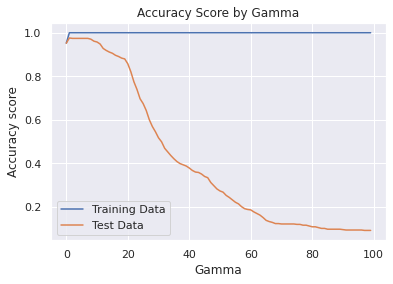

In [0]:
space = np.linspace(0.0001,1,100)
yTrain = []
yTest = []

for i in space:
  clf = svm.SVC(kernel='rbf', gamma=i,C=10)
  #Train the model using the training sets
  clf.fit(X_train, Y_train)
  #Predict the response for test dataset
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  #print("Accuracy:",metrics.accuracy_score(Y_train, y_pred))
  yTrain.append(metrics.accuracy_score(Y_train, y_pred_train))
  yTest.append(metrics.accuracy_score(Y_test, y_pred_test))

plt.plot(yTrain, label='Training Data')
plt.plot(yTest, label='Test Data')
plt.xlabel('Gamma')
plt.ylabel('Accuracy score')
plt.title('Accuracy Score by Gamma')
plt.legend()